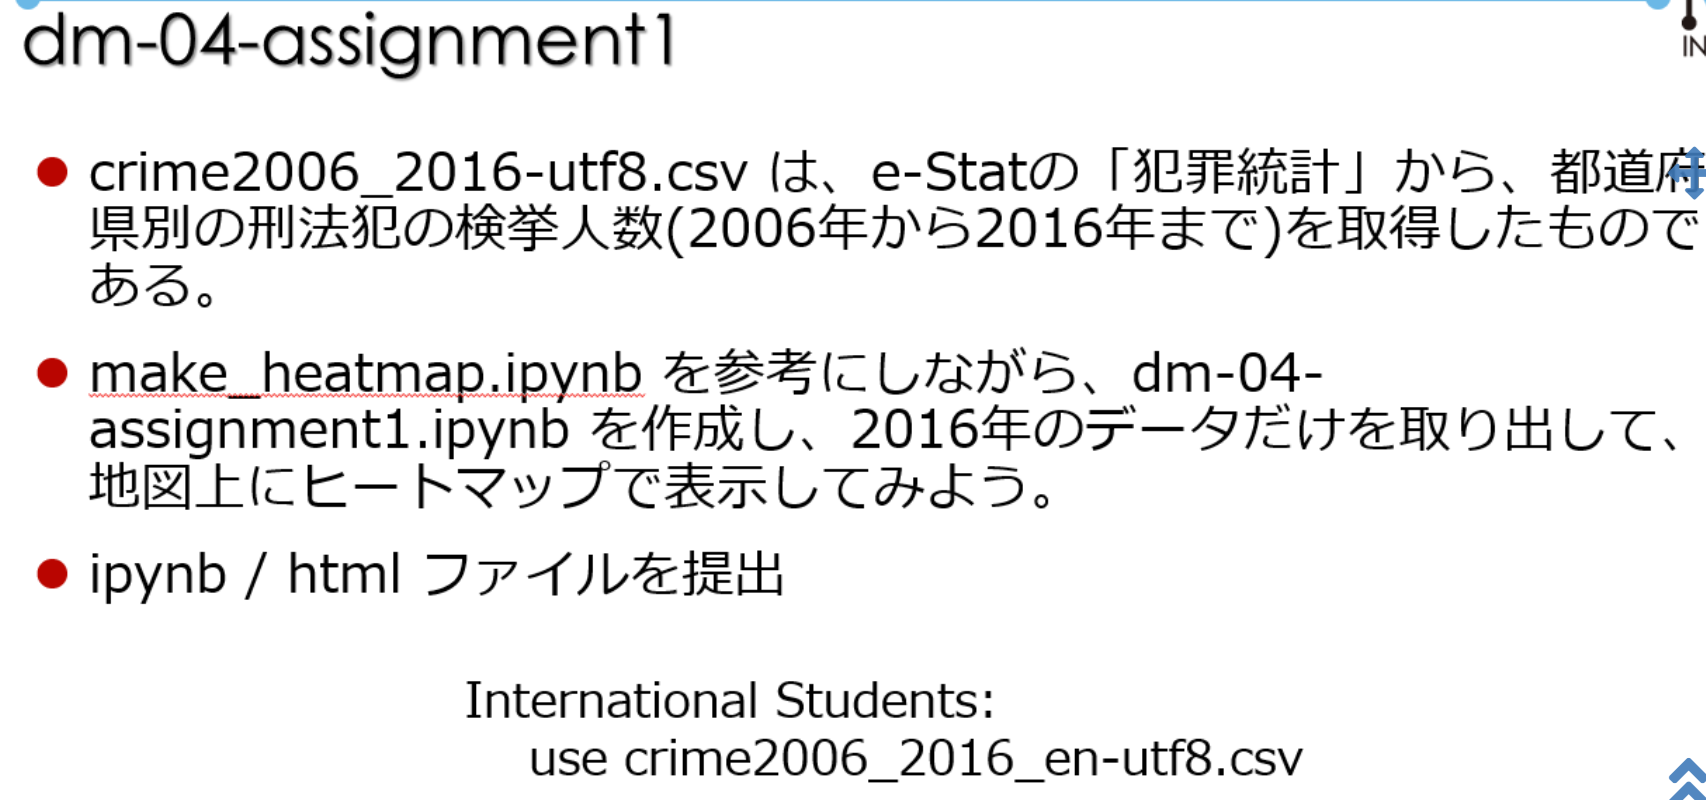

In [22]:
import pandas as pd
import folium

In [23]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

#### Read CSV file

In [25]:
df = pd.read_csv('data/crime2006_2016-utf8.csv', sep=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(517, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   年       517 non-null    int64 
 1   都道府県    517 non-null    object
 2   検挙人数    517 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 12.2+ KB
None


,年,都道府県,検挙人数
0,2016,北海道,8460
1,2016,青森県,1621
2,2016,岩手県,1282
3,2016,宮城県,3209
4,2016,秋田県,1364


In [26]:
df2016 = df[ df['年']==2016 ]
print(df2016.shape)
print(df2016.info())
print(df2016)

(47, 3)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   年       47 non-null     int64 
 1   都道府県    47 non-null     object
 2   検挙人数    47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB
None
       年  都道府県   検挙人数
0   2016   北海道   8460
1   2016   青森県   1621
2   2016   岩手県   1282
3   2016   宮城県   3209
4   2016   秋田県   1364
5   2016   山形県   1910
6   2016   福島県   2374
7   2016   東京都  31044
8   2016   茨城県   4873
9   2016   栃木県   2841
10  2016   群馬県   4063
11  2016   埼玉県  12739
12  2016   千葉県  10158
13  2016  神奈川県  16356
14  2016   新潟県   3731
15  2016   山梨県   1143
16  2016   長野県   2411
17  2016   静岡県   6812
18  2016   富山県   1584
19  2016   石川県   1687
20  2016   福井県   1153
21  2016   岐阜県   2845
22  2016   愛知県  14505
23  2016   三重県   2159
24  2016   滋賀県   2172
25  2016   京都府   4489
26  2016   大阪府  17484
27  2016   兵庫県  12145
28  2016   奈良県   

#### UTF-8, delimiter is ',', skip no line and read header  

In [27]:
df_pos = pd.read_csv('data/h3010pref_pos_utf8.csv', sep=',', skiprows=0, header=0)
print(df_pos.shape)
display(df_pos.head())

(1963, 3)


,name,lat,lon
0,北海道,43.064278,141.346785
1,札幌市,43.061945,141.354395
2,札幌市中央区,43.055390,141.340980
3,札幌市北区,43.090691,141.340922
4,札幌市東区,43.076111,141.363616


In [30]:
df_m = pd.merge(df2016, df_pos, left_on='都道府県', right_on='name', how='left')
print(df_m.shape)
display(df_m.head())

(47, 6)


,年,都道府県,検挙人数,name,lat,lon
0,2016,北海道,8460,北海道,43.064278,141.346785
1,2016,青森県,1621,青森県,40.824338,140.740087
2,2016,岩手県,1282,岩手県,39.703647,141.152592
3,2016,宮城県,3209,宮城県,38.268803,140.871846
4,2016,秋田県,1364,秋田県,39.718058,140.103250


#### Drop unneed column    

In [31]:
df_m2 = df_merged.drop(columns='name')
print(df_m2.shape)
display(df_m2)

(47, 5)


,年,都道府県,検挙人数,lat,lon
0,2016,北海道,8460,43.064278,141.346785
1,2016,青森県,1621,40.824338,140.740087
2,2016,岩手県,1282,39.703647,141.152592
3,2016,宮城県,3209,38.268803,140.871846
4,2016,秋田県,1364,39.718058,140.103250
5,2016,山形県,1910,38.240457,140.363278
6,2016,福島県,2374,37.749957,140.467734
7,2016,東京都,31044,35.689568,139.691717
8,2016,茨城県,4873,36.341450,140.446735
9,2016,栃木県,2841,36.565689,139.883528


In [32]:
df_heat = df_m2[['lat', 'lon', '検挙人数']]
print(df_heat.shape)
display(df_heat.head())

(47, 3)


,lat,lon,検挙人数
0,43.064278,141.346785,8460
1,40.824338,140.740087,1621
2,39.703647,141.152592,1282
3,38.268803,140.871846,3209
4,39.718058,140.103250,1364


#### Make map  

In [33]:
from folium.plugins import HeatMap

m = folium.Map(location=[35, 140], zoom_start=4)
m.add_child(HeatMap(df_heat, radius=12))
display(m)